In [1]:
# 1. Load Dataset into Notebook
import pandas as pd

data = pd.read_csv('Mall_Customers.csv', index_col=0)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


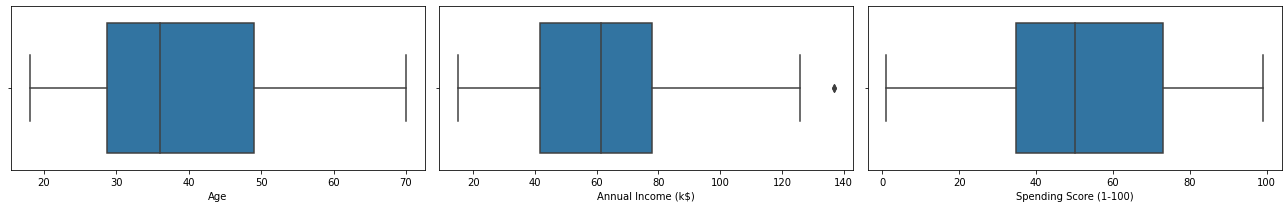

In [2]:
# 2. Perform Analysis
# Univariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize=(18,3), tight_layout=True)
 
sns.boxplot(ax=axes[0], data=data, x='Age')
sns.boxplot(ax=axes[1], data=data, x='Annual Income (k$)')
sns.boxplot(ax=axes[2], data=data, x='Spending Score (1-100)')

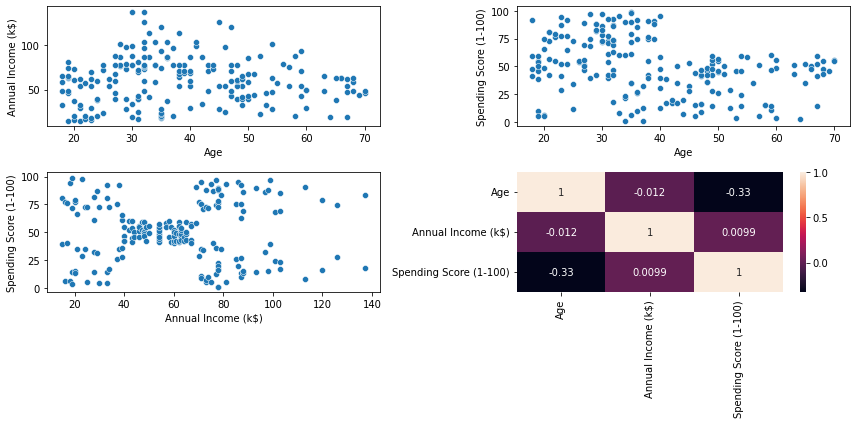

In [3]:
#Bivariate Analysis
fig, axes = plt.subplots(2,2, figsize=(12,6), tight_layout=True)
 
sns.scatterplot(ax=axes[0, 0], data=data, x='Age', y='Annual Income (k$)')
sns.scatterplot(ax=axes[0, 1], data=data, x='Age', y='Spending Score (1-100)')
sns.scatterplot(ax=axes[1, 0], data=data, x='Annual Income (k$)', y='Spending Score (1-100)')
sns.heatmap(ax=axes[1, 1], data=data.corr(), annot=True)

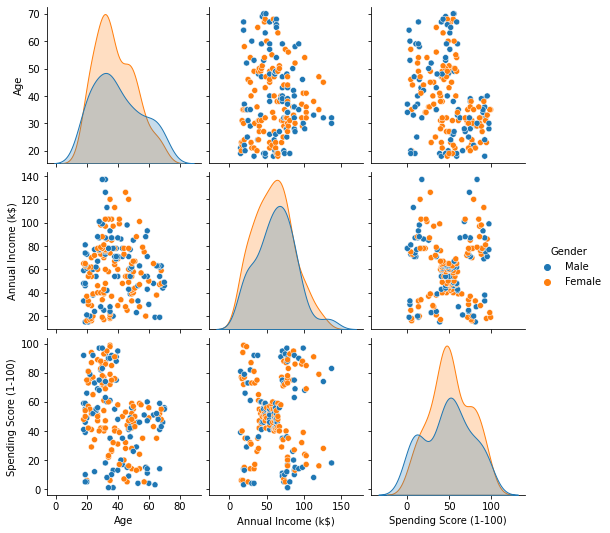

In [4]:
#Multivariate Analysis
sns.pairplot(data, hue='Gender')

In [5]:
# 3. descriptive ananlysis on dataset

data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
# 4. Checking for missing values

data.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

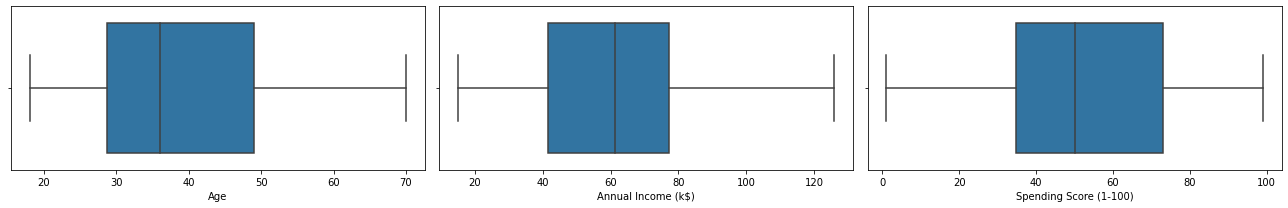

In [7]:
# 5. Dealing with outliers - Outliers were detected in the Box plot during univariate analysis
import numpy as np

for i in data.axes[1]:
  if(i!='Gender'):
    Q1= data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    upper_limit =Q3 + 1.5*IQR
    lower_limit =Q1 - 1.5*IQR
    data[i] = np.where(data[i]>upper_limit,data[i].median(),data[i])

fig, axes = plt.subplots(1,3, figsize=(18,3), tight_layout=True)
 
sns.boxplot(ax=axes[0], data=data, x='Age')
sns.boxplot(ax=axes[1], data=data, x='Annual Income (k$)')
sns.boxplot(ax=axes[2], data=data, x='Spending Score (1-100)')

In [8]:
# 6. Dealing with categorical values
from sklearn.preprocessing import LabelEncoder
lbEnc=LabelEncoder()
data['Gender'] = lbEnc.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19.0,15.0,39.0
2,1,21.0,15.0,81.0
3,0,20.0,16.0,6.0
4,0,23.0,16.0,77.0
5,0,31.0,17.0,40.0


In [9]:
# 7. Scaling variables
from sklearn.preprocessing import scale
data_scaled=pd.DataFrame(scale(data),columns=data.columns)
data_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.788777,-0.434801
1,1.128152,-1.281035,-1.788777,1.195704
2,-0.886405,-1.352802,-1.748853,-1.715913
3,-0.886405,-1.137502,-1.748853,1.040418
4,-0.886405,-0.563369,-1.708930,-0.395980


In [10]:
# 9. Clustering Model
from sklearn import cluster

error = []
for i in range(1,16):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(data_scaled)
  error.append(kmeans.inertia_)

In [11]:
error

[800.0000000000002,
 588.8033562356138,
 477.38499162307966,
 389.5968649815535,
 326.81695277491116,
 276.2603505459519,
 236.6991953333777,
 200.37513244180604,
 173.421770719527,
 150.03320384962316,
 134.81231094731163,
 122.71003539456947,
 111.229206812489,
 104.39393400991369,
 98.58535167222833]

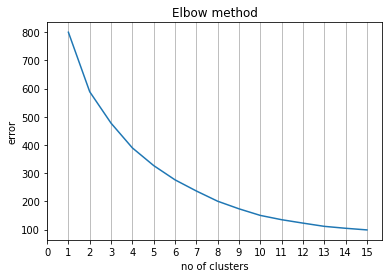

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1,16),error)
plt.title('Elbow method')
plt.xlabel('no of clusters')
plt.ylabel('error')
plt.xticks(np.arange(0, len(error)+1, 1))
plt.grid(axis='x')
plt.show()

In [13]:
km_model=cluster.KMeans(n_clusters=5,init='k-means++',random_state=0)
km_model.fit(data_scaled)

KMeans(n_clusters=5, random_state=0)

In [14]:
X_class = km_model.predict(data_scaled)
X_class

array([4, 4, 3, 1, 3, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 4, 3, 4, 2, 1, 2, 4,
       3, 4, 3, 4, 3, 4, 3, 1, 2, 1, 2, 4, 3, 1, 3, 1, 3, 1, 3, 4, 2, 1,
       3, 1, 3, 1, 1, 1, 3, 4, 1, 2, 3, 2, 3, 2, 1, 2, 2, 4, 3, 3, 2, 4,
       3, 3, 4, 1, 2, 3, 3, 3, 2, 4, 3, 4, 1, 3, 2, 4, 2, 3, 1, 2, 3, 1,
       1, 3, 3, 4, 2, 3, 1, 4, 3, 1, 2, 4, 1, 3, 2, 4, 2, 1, 3, 2, 2, 2,
       2, 1, 3, 4, 1, 1, 3, 3, 3, 3, 4, 3, 1, 4, 1, 1, 0, 4, 2, 4, 0, 4,
       1, 1, 0, 1, 0, 4, 0, 1, 3, 4, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 0, 4, 0, 1, 0, 1, 0, 4, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 4], dtype=int32)

In [15]:
data['Class']=X_class.tolist()
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
CustomerID,,,,,
1,1,19.0,15.0,39.0,4
2,1,21.0,15.0,81.0,4
3,0,20.0,16.0,6.0,3
4,0,23.0,16.0,77.0,1
5,0,31.0,17.0,40.0,3


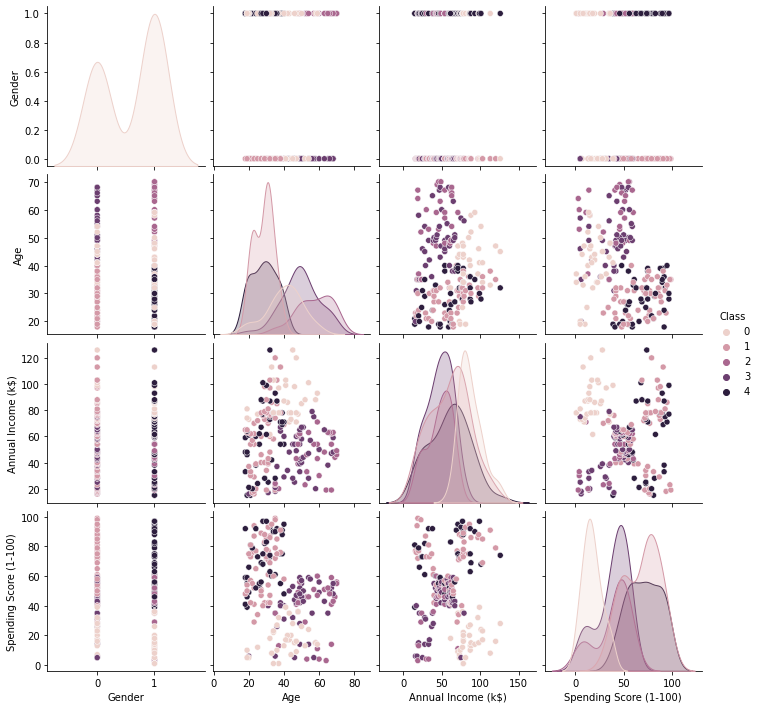

In [16]:
sns.pairplot(data, hue='Class')